## **California Housing Prices**

## *Daftar Isi*

1. Business Problem Understanding (Latar Belakang)
2. Data Understanding (Pemahaman Data)
3. Data Preprocessing (Pra-Pemrosesan Data)
4. Modelling
5. Kesimpulan dan Rekomendasi Aksi

# Business Problem Understanding (Latar Belakang)

California adalah sebuah negara bagian di Amerika Serikat yang terletak di pesisir barat negara tersebut. Negara bagian ini adalah salah satu negara bagian dengan jumlah penduduk yang tertinggi diantara negara bagian lainnya. Banyak orang dari penjuru dunia datang ke negara bagian ini untuk pendidikan, liburan, dan kegiatan lainnya. Negara bagian ini memiliki beberapa kota yang dikenal secara luas oleh orang-orang di dunia seperti Los Angeles dan San Franscisco.

Pada kedua kota ini, banyak rumah-rumah memiliki lokasi dan desain yang bagus dan tidak jarang dari rumah-rumah tersebut memiliki harga yang tinggi. Kota-kota ini memiliki beberapa lokasi permukiman terpusat yang masing-masing lokasi ini memiliki ciri khas tersendiri dan kedekatan dengan beberapa tempat wisata. Para pemilik rumah yang ingin menjual rumahnya terkadang tidak tahu informasi dalam menentukan harga kini dari rumah mereka. Mereka bisa saja menjual rumah melalui sebuah real estate agency namun mereka harus membayar biaya jasa agency dan mereka akan menerima uang hasil penjualan rumah yang lebih rendah dibandingkan dengan memperoleh informasi harga rumah mereka dengan menggunakan ilmu Machine Learning berdasarkan data-data pendukung.

# *Rumusan masalah*

1. Bagaimana menentukan harga rumah yang tepat berdasarkan fitur dan karakteristik rumah?

# *Tujuan Penelitian*

1. Mengetahui cara menentukan harga rumah yang tepat berdasarkan fitur dan karakteristik rumah

# *Metodologi Penelitian*

Proses analisis akan mensimulasi beberapa model-model Machine Learning dan dari model-model tersebut akan dicari nilai error-nya seperti RMSE, MAE, dan MAPE. Model yang memiliki nilai error yang terkecil akan dipakai untuk memprediksi nilai target. Semakin kecil nilai error nya, maka model semakin akurat sehingga target dapat lebih akurat untuk diprediksi.

Dikarenakan model yang dipilih tidak sepenuhnya akurat, maka akan diterapkan ensemble model agar prediksi yang didapat lebih baik lagi.

# Pemahaman Data

**Informasi Fitur**

| **Fitur** | **Tipe Data** | **Penjelasan** |
| --- | --- | --- |
| Longitude | Float | Longitude |
| Latitude | Float | Latitude |
| housing_median_age | Integer | Nilai Tengah Umur Rumah |
| total_rooms | Integer | Jumlah Ruangan |
| total_bedrooms | Integer | Jumlah Kamar Tidur |
| population | Integer | Populasi |
| households | Integer | Jumlah Rumah |
| median_income | Float | Nilai Tengah Pendapatan |
| ocean_proximity | Object | Kedekatan dengan Pantai |
| median_house_value | Integer | Nilai Tengah Harga Rumah |

<br>

Pertama-tama, import data dilakukan untuk mendukung proses analisis

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Kemudian, dataset diimpor untuk dijadikan bahan analisis

In [481]:
bd = pd.read_csv('data_california_house.csv')
bd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


# Pra-Pemrosesan Data

# *Data Cleaning (Pembersihan Data*)

Data terlebih dahulu diidentifikasi missing valuenya, dan kemudian missing value tersebut dihapus sehingga data yang diperoleh dapat menjadi representatif.

In [482]:
bd.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [483]:
bd.duplicated().sum()

np.int64(0)

Tidak ditemukan data duplikat didalam dataframe

In [484]:
bd.dropna(inplace=True)

In [485]:
bd.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Missing value telah disingkirkan dan kemudian whitespace diidentifikasi keberadaannya sekiranya ada.

In [486]:
print(bd['ocean_proximity'].str.startswith(' ').unique())
print(bd['ocean_proximity'].str.endswith(' ').unique())

[False]
[False]


Whitespace terbukti tidak ada, terbukti dari unique value hanya terdapat "False". Setelah itu dilakukan uji normal terhadap target. Kolom target, berdasarkan uji statistik, dinyatakan tidak normal.

In [487]:
#Penanganan Outliers
from scipy.stats import normaltest
stats, pval=normaltest(bd['median_house_value'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho

tidak normal


Kemudian, outliers pada target diidentifikasi dan dihapus agar proses Machine Learning dapat menjadi robust dan akurat.

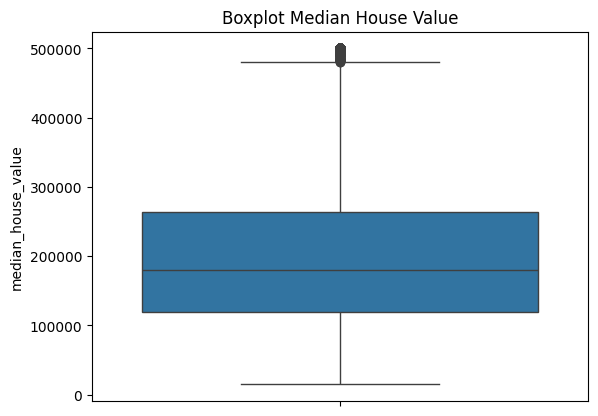

In [488]:
sns.boxplot(y='median_house_value', data=bd)
plt.title('Boxplot Median House Value')
plt.show()

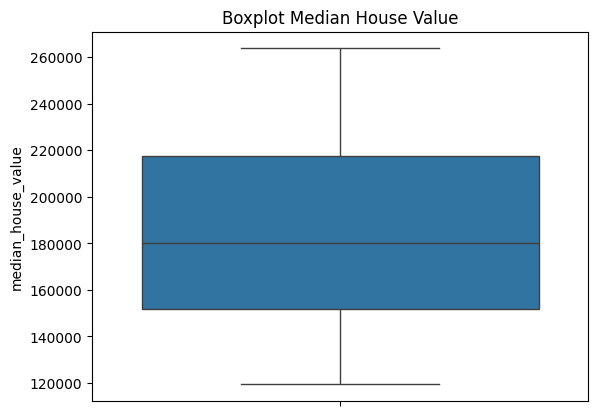

In [489]:
bd['median_house_value'] = bd['median_house_value'][bd['median_house_value'].between(bd['median_house_value'].quantile(.25), bd['median_house_value'].quantile(.75))]
sns.boxplot(y='median_house_value', data=bd)
plt.title('Boxplot Median House Value')
plt.show()

Kolom "Longitude" dan "Latitude" dianggap tidak relevan dengan proses analisis. Maka dari itu, kedua kolom tersebut dihapus.

In [490]:
bd.drop(columns=['longitude', 'latitude'], inplace=True)

In [491]:
bd

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,NaN
1,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,NaN
2,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,NaN
3,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,NaN
...,...,...,...,...,...,...,...,...
14442,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,NaN
14443,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14446,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,NaN


Missing value timbul akibat penghapusan outlier pada kolom 'median_house_value'. Maka dari itu, penghapusan missing value dilakukan kembali.

In [492]:
bd.dropna(inplace=True)
bd

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
7,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0
10,18.0,4356.0,1334.0,1968.0,1245.0,3.6294,<1H OCEAN,240000.0
13,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,INLAND,139200.0
14,27.0,2203.0,493.0,1158.0,492.0,2.4342,INLAND,119500.0
...,...,...,...,...,...,...,...,...
14435,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,196900.0
14439,25.0,1631.0,415.0,1045.0,386.0,2.4505,<1H OCEAN,147500.0
14440,11.0,3098.0,490.0,1391.0,484.0,4.9792,NEAR OCEAN,170400.0
14443,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0


In [493]:
y = bd['median_house_value']
y

3        175000.0
7        137000.0
10       240000.0
13       139200.0
14       119500.0
           ...   
14435    196900.0
14439    147500.0
14440    170400.0
14443    144600.0
14444    159400.0
Name: median_house_value, Length: 7159, dtype: float64

Selanjutnya, saya ingin mengetahui nilai P terhadap target dari setiap kolom menggunakan OLS. Untuk setiap kolom yang memiliki nilai p yang lebih dari 0.05, maka kolom tersebut akan dihapus karena dianggap tidak berpengaruh kepada target secara signifikan.

In [494]:
a = bd.drop(['median_house_value'], axis=1)
a = pd.get_dummies(a, dtype=int)
a

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,1,0,0,0
7,17.0,3917.0,638.0,1809.0,564.0,5.2586,0,1,0,0
10,18.0,4356.0,1334.0,1968.0,1245.0,3.6294,1,0,0,0
13,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,0,1,0,0
14,27.0,2203.0,493.0,1158.0,492.0,2.4342,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14435,31.0,1952.0,471.0,936.0,462.0,2.8621,0,0,0,1
14439,25.0,1631.0,415.0,1045.0,386.0,2.4505,1,0,0,0
14440,11.0,3098.0,490.0,1391.0,484.0,4.9792,0,0,0,1
14443,20.0,1314.0,229.0,712.0,219.0,4.4125,0,1,0,0


In [495]:
import statsmodels.api as sm
model = sm.OLS(y, a)
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     308.4
Date:                Tue, 14 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:24:55   Log-Likelihood:                -84741.
No. Observations:                7159   AIC:                         1.695e+05
Df Residuals:                    7149   BIC:                         1.696e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
housing_median_age  

Tidak ada kolom yang tidak berpengaruh terhadap target ('median_house_value'). Maka dari itu, tidak ada kolom yang dihapus. Selanjutnya saya ingin mengetahui multicolinearity antar kolom.

In [496]:
#Multicolinearity
a.corr(method="spearman")

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
housing_median_age,1.000000,-0.430467,-0.370459,-0.293148,-0.342925,-0.232293,0.127885,-0.311824,0.196577,0.023346
total_rooms,-0.430467,1.000000,0.920926,0.808857,0.905670,0.192962,-0.083424,0.145839,-0.048146,-0.016168
total_bedrooms,-0.370459,0.920926,1.000000,0.869017,0.975554,-0.078697,-0.014017,0.035435,-0.050665,0.023093
population,-0.293148,0.808857,0.869017,1.000000,0.902087,-0.028515,0.113427,-0.036180,-0.095497,-0.035814
households,-0.342925,0.905670,0.975554,0.902087,1.000000,-0.054554,0.017856,-0.007165,-0.041185,0.020743
median_income,-0.232293,0.192962,-0.078697,-0.028515,-0.054554,1.000000,-0.008505,0.102566,-0.015705,-0.104350
ocean_proximity_<1H OCEAN,0.127885,-0.083424,-0.014017,0.113427,0.017856,-0.008505,1.000000,-0.593983,-0.370508,-0.403448
ocean_proximity_INLAND,-0.311824,0.145839,0.035435,-0.036180,-0.007165,0.102566,-0.593983,1.000000,-0.190966,-0.207943
ocean_proximity_NEAR BAY,0.196577,-0.048146,-0.050665,-0.095497,-0.041185,-0.015705,-0.370508,-0.190966,1.000000,-0.129709
ocean_proximity_NEAR OCEAN,0.023346,-0.016168,0.023093,-0.035814,0.020743,-0.104350,-0.403448,-0.207943,-0.129709,1.000000


In [497]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [498]:
def calc_VIF(a):
    vif = pd.DataFrame()
    vif["Features"] = a.columns
    vif["VIF"] = [variance_inflation_factor(a.values, i) for i in range(len(a.columns))]
    vif["Acceptance"] = np.where(vif["VIF"]>4, "No", "Yes")

    return vif

calc_VIF

<function __main__.calc_VIF(a)>

In [499]:
calc_VIF(a)

,Features,VIF,Acceptance
0,housing_median_age,1.412477,Yes
1,total_rooms,15.317341,No
2,total_bedrooms,37.175005,No
3,population,5.935807,No
4,households,30.003914,No
5,median_income,1.643203,Yes
6,ocean_proximity_<1H OCEAN,20.390403,No
7,ocean_proximity_INLAND,7.896189,No
8,ocean_proximity_NEAR BAY,5.198926,No
9,ocean_proximity_NEAR OCEAN,5.022932,No


In [500]:
calc_VIF(a.drop(columns=['total_bedrooms']))

,Features,VIF,Acceptance
0,housing_median_age,1.401968,Yes
1,total_rooms,9.422417,No
2,population,5.647770,No
3,households,12.655279,No
4,median_income,1.348738,Yes
5,ocean_proximity_<1H OCEAN,18.106847,No
6,ocean_proximity_INLAND,7.108202,No
7,ocean_proximity_NEAR BAY,4.810624,No
8,ocean_proximity_NEAR OCEAN,4.551224,No


Kolom 'total_bedrooms' dihapus karena dianggap memiliki keterkaitan antar kolom yang tinggi yang akan mempengaruhi proses analisis. Untuk kolom sisanya, multicolinearity akan diatasi melalui rekayasa nilai alpha menggunakan ridge dan lasso pada analisis berikutnya.

# Modelling

Kemudian, modelling dilakukan untuk memulai proses analisis. Ritual import data dilakukan untuk mendukung proses analisis sesuai dengan kebutuhan.

In [501]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, cross_validate

In [502]:
X = bd.drop(['median_house_value', 'total_bedrooms'], axis=1)
X

,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
3,17.0,2518.0,3051.0,1000.0,1.7199,<1H OCEAN
7,17.0,3917.0,1809.0,564.0,5.2586,INLAND
10,18.0,4356.0,1968.0,1245.0,3.6294,<1H OCEAN
13,12.0,7923.0,4861.0,1385.0,4.2985,INLAND
14,27.0,2203.0,1158.0,492.0,2.4342,INLAND
...,...,...,...,...,...,...
14435,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN
14439,25.0,1631.0,1045.0,386.0,2.4505,<1H OCEAN
14440,11.0,3098.0,1391.0,484.0,4.9792,NEAR OCEAN
14443,20.0,1314.0,712.0,219.0,4.4125,INLAND


Data Train dan Data Test dipisahkan dengan komposisi 70:30

In [503]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

Transformer dibentuk dengan tujuan mendukung numerisasi data kategorikal.

In [504]:
transformer = ColumnTransformer([('One Hot', OneHotEncoder(drop='first'), ['ocean_proximity'])], remainder='passthrough')

In [505]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(drop='first'),
                                 ['ocean_proximity'])])

### **Cross Validation**

Cross Validation dilakukan dengan tujuan melakukan pembandingan antar model untuk mengetahui model mana yang memiliki error yang paling kecil sehingga dapat dipakai sebagai model of choice.

In [506]:
lasso_model = Lasso(random_state=0)
ridge_model = Ridge(random_state=0)
dectree_model = DecisionTreeRegressor(random_state=0)
knn_model = KNeighborsRegressor()
linreg_model = LinearRegression()
ranfor_model = RandomForestRegressor(random_state=0)
xgb_model = XGBRegressor(random_state=0)

daftaralgo = [lasso_model, ridge_model, dectree_model, knn_model, linreg_model, ranfor_model, xgb_model]

skor = ['neg_root_mean_squared_error',
          'neg_mean_absolute_percentage_error',
          'neg_mean_absolute_error']

daftarmeanrmse =[]
daftarstdrmse = []

daftarmeanmae =[]
daftarstdmae = []

daftarmeanmape =[]
daftarstdmape = []

scaler = StandardScaler()

for algoritma in daftaralgo:
    model = algoritma
    model_pipa = Pipeline([
    ('preprocessing',transformer),
    ('scaler', scaler),
    ('modeling', model)
    ])

#cross validation
    skorCV = cross_validate(
        estimator = model_pipa,   
        X = X_train,
        y = y_train,
        scoring = skor,
        cv = 10  
)

#scoring 
    daftarmeanrmse.append(skorCV['test_neg_root_mean_squared_error'].mean())
    daftarstdrmse.append(skorCV['test_neg_root_mean_squared_error'].std())

    daftarmeanmae.append(skorCV['test_neg_mean_absolute_error'].mean())
    daftarstdmae.append(skorCV['test_neg_mean_absolute_error'].std())

    daftarmeanmape.append(skorCV['test_neg_mean_absolute_percentage_error'].mean())
    daftarstdmape.append(skorCV['test_neg_mean_absolute_percentage_error'].std())

In [507]:
bdcv = pd.DataFrame()
bdcv['Algoritma'] = daftaralgo

bdcv['mean_RMSE'] = daftarmeanrmse
bdcv['std_RMSE'] = daftarstdrmse

bdcv['mean_MAE'] = daftarmeanmae
bdcv['std_MAE'] = daftarstdmae

bdcv['mean_MAPE'] = daftarmeanmape
bdcv['std_MAPE'] = daftarstdmape

bdcv

,Algoritma,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE
0,Lasso(random_state=0),-33433.914190,978.726487,-27419.121025,864.001083,-0.154778,0.005670
1,Ridge(random_state=0),-33433.910389,977.791790,-27420.236857,863.518903,-0.154784,0.005668
2,DecisionTreeRegressor(random_state=0),-44587.488185,1406.979717,-34741.700464,1357.951904,-0.195078,0.008502
3,KNeighborsRegressor(),-34299.309289,931.527452,-27164.169748,858.176892,-0.152165,0.005712
4,LinearRegression(),-33433.967262,979.093604,-27418.707451,864.193615,-0.154775,0.005671
5,RandomForestRegressor(random_state=0),-32769.310040,949.863955,-26180.140641,935.834679,-0.147552,0.005937
6,"XGBRegressor(base_score=None, booster=None, ca...",-34385.433555,881.801584,-27210.960287,842.219739,-0.152791,0.005978


Model XGBoost dan Random Forest memiliki error yang paling kecil. Selanjutnya kedua model ini akan dipakai dan diperbandingkan kembali untuk ditentukan mana yang terbaik dengan cara diprediksi ke test set secara langsung.

In [508]:
modelmodel = {
    'xgb_model': XGBRegressor(random_state=1),
    'ranfor_model': RandomForestRegressor(random_state=1)
}

rmse_skor = []
mae_skor = []
mape_skor = []

# Prediksi pada test set
for i in modelmodel:

    model_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', modelmodel[i])
        ])

    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    rmse_skor.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_skor.append(mean_absolute_error(y_test, y_pred))
    mape_skor.append(mean_absolute_percentage_error(y_test, y_pred))

skorsebelumtuning = pd.DataFrame({'RMSE': rmse_skor, 'MAE': mae_skor, 'MAPE': mape_skor}, index=modelmodel.keys())
skorsebelumtuning

,RMSE,MAE,MAPE
xgb_model,34225.423323,27287.400009,0.153574
ranfor_model,33162.267941,26548.121043,0.149412


Model Random Forest dianggap paling baik karena memiliki nilai error pada ketiga Regression Metrics yang lebih kecil dibandingkan dengan XGBoost Model.

### **Hyperparameter Tuning**

Hyperparameter Tuning dilakukan pada model Random Forest agar ditemukan kombinasi antara parameter yang terbaik sehingga error dapat diminimalkan secara maksimal.

In [509]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Define the transformer and scaler
scaler = StandardScaler()
transformer = ColumnTransformer([('One Hot', OneHotEncoder(drop='first'), ['ocean_proximity'])], remainder='passthrough')

# Hyperparameter space
max_depth = list(np.arange(3, 21, 1))
min_samples_split = list(np.arange(2, 21, 2))
max_leaf_nodes = list(np.arange(10, 51, 10))
min_samples_leaf = list(np.arange(1, 21, 1))
n_estimators = list(np.arange(50, 201, 50))
max_samples = list(np.linspace(0.1, 1.0, 10))
max_features = list(np.arange(1, X_train.shape[1] + 1, 1))  

hyperparam_space_ranfor = {
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__max_leaf_nodes': max_leaf_nodes,
    'model__min_samples_leaf': min_samples_leaf,
    'model__n_estimators': n_estimators,
    'model__max_samples': max_samples,
    'model__max_features': max_features
}

# RandomForest model
ranfor_model = RandomForestRegressor(random_state=1)

# Define pipeline
ranfor_model_estimator = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', ranfor_model)
])

# RandomizedSearchCV
random_ranfor = RandomizedSearchCV(
    ranfor_model_estimator,
    param_distributions=hyperparam_space_ranfor,
    n_iter=50,
    cv=10,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],  # Use a single scoring metric
    n_jobs=-1,
    refit='neg_root_mean_squared_error',
    random_state=1
)

# Assuming X_train and y_train are defined
random_ranfor.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestRegressor(random_state=1))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__max_depth': [np.int64(3),
                                                             np.int64(4)...
                                        'model__min_samples_split': [np.int64(2),
                                                                     np.int64(4),
                                                                     np.int64(6),
                                                                     np.int64(8),
                                                                     np.int64(10),
                                                                     np.int64(12),
                                                                     np.int64(14),
                                                                     np.int64(16),
                                                                     np.int64(18),
                                                                     np.int64(20)],
                                        'model__n_estimators': [np.int64(50),
                                                                np.int64(100),
                                                                np.int64(150),
                                                                np.int64(200)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [510]:
pd.DataFrame(random_ranfor.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_samples,param_model__max_leaf_nodes,param_model__max_features,...,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,split5_test_neg_mean_absolute_percentage_error,split6_test_neg_mean_absolute_percentage_error,split7_test_neg_mean_absolute_percentage_error,split8_test_neg_mean_absolute_percentage_error,split9_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
2,1.115645,0.034387,0.042767,0.006264,100,8,12,0.5,40,5,...,-0.141746,-0.146974,-0.153781,-0.146976,-0.141975,-0.159659,-0.149120,-0.149875,0.005366,3
15,0.781096,0.028015,0.027276,0.002336,50,14,10,0.8,40,6,...,-0.142368,-0.145573,-0.152442,-0.147520,-0.141643,-0.158825,-0.147870,-0.149412,0.005128,1
18,1.617945,0.021365,0.041189,0.005102,100,16,17,1.0,40,6,...,-0.141710,-0.145482,-0.153461,-0.147471,-0.141418,-0.159471,-0.148408,-0.149488,0.005431,2
22,1.656888,0.035504,0.052935,0.006576,150,18,14,0.7,40,4,...,-0.142917,-0.147192,-0.155823,-0.147717,-0.142922,-0.161694,-0.150855,-0.150950,0.005604,6
43,1.234952,0.021420,0.051466,0.004935,150,20,15,0.3,30,5,...,-0.142908,-0.147156,-0.155214,-0.146755,-0.143087,-0.161320,-0.150025,-0.150781,0.005588,5


In [511]:
print('Random Forest')
print('Skor Terbaik:', random_ranfor.best_score_)
print('Parameter Terbaik:', random_ranfor.best_params_)

Random Forest
Skor Terbaik: -32717.181282379977
Parameter Terbaik: {'model__n_estimators': np.int64(100), 'model__min_samples_split': np.int64(8), 'model__min_samples_leaf': np.int64(12), 'model__max_samples': np.float64(0.5), 'model__max_leaf_nodes': np.int64(40), 'model__max_features': np.int64(5), 'model__max_depth': np.int64(20)}


Skor terbaik untuk error dari hasil hyperparameter tuning adalah -32717.181 dan parameter terbaik ditemukan.

In [512]:
model1 = {'Random Forest': RandomForestRegressor(random_state=1)}

ranfor_tuning = random_ranfor.best_estimator_

ranfor_tuning.fit(X_train, y_train)

y_pred_ranfor_tuning = ranfor_tuning.predict(X_test)

rmse_ranfor_tuning = np.sqrt(mean_squared_error(y_test, y_pred_ranfor_tuning))
mae_ranfor_tuning = mean_absolute_error(y_test, y_pred_ranfor_tuning)
mape_ranfor_tuning = mean_absolute_percentage_error(y_test, y_pred_ranfor_tuning)

skorsetelahtuning = pd.DataFrame({'RMSE': rmse_ranfor_tuning, 'MAE': mae_ranfor_tuning, 'MAPE': mape_ranfor_tuning}, index=model1.keys())
skorsetelahtuning

,RMSE,MAE,MAPE
Random Forest,32857.114114,26901.96836,0.151038


Nilai RMSE berhasil dikurangi melalui hyperparameter tuning, sehingga hyperparameter tuning dianggap berhasil.

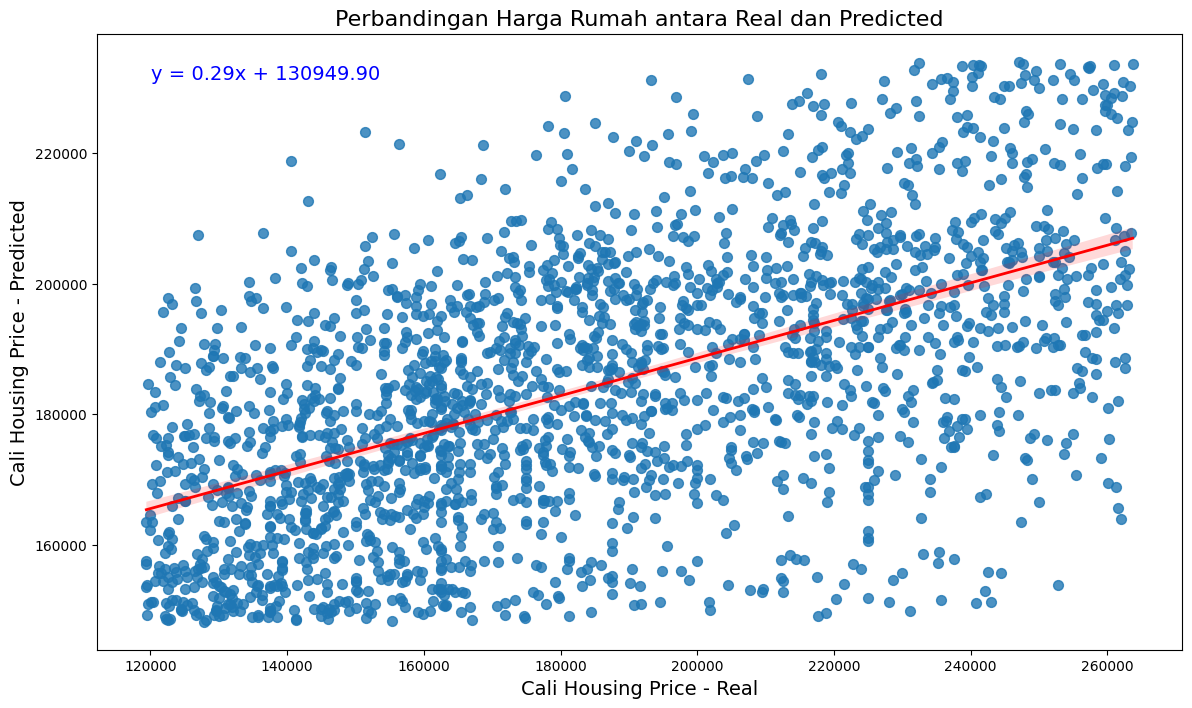

In [515]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(np.array(y_test).reshape(-1, 1), y_pred_ranfor_tuning)

slope = regressor.coef_[0]
intercept = regressor.intercept_

plt.figure(figsize=(14, 8))

sns.regplot(x=y_test, y=y_pred_ranfor_tuning, scatter_kws={'s': 50}, line_kws={'color': 'red', 'lw': 2})

plt.title('Perbandingan Harga Rumah antara Real dan Predicted', fontsize=16)
plt.xlabel('Cali Housing Price - Real', fontsize=14)
plt.ylabel('Cali Housing Price - Predicted', fontsize=14)

equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=14, color='blue', ha='left', va='top')

plt.show()

Berikut adalah hasil akhir dari analisis. Harga rumah real dan harga rumah prediksi berkorelasi melalui persamaan y = 0.29x + 130949.90 dan kedua nya saling berbanding lurus.

# Kesimpulan dan Rekomendasi

Kesimpulan
- Model akan memberikan prediksi yang meleset sebesar 15% dari data sesungguhnya, terbukti dari nilai MAPE yang berada pada sekitaran 15%.

Rekomendasi
- Libatkan lebih banyak data, agar hasil yang diprediksi dapat menjadi lebih kecil dalam hal errornya, sehingga lebih akurat
- Libatkan fitur-fitur yang lebih berkorelasi kuat dengan harga rumah